In [209]:
using DataFrames
using Gadfly
using Colors

## Logistic Regression for single variable

In [411]:
data = readtable("ex1data1.txt");

## Renaming columns of the dataset

newname = ["Population", "Profit"];
names!(data.colindex, map(parse, newname));

In [412]:
X = data[:Population];  #features
y = data[:Profit];  #labels

In [413]:
num_tr_ex = length(y);  #96

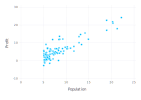

In [414]:
# Plotting the dataset
p = plot(data, x="Population", y="Profit", Geom.point)

In [415]:
function computeCost(X,y,theta)
    return mapreduce(x->x^2, +, (X*theta - y))/(2*num_tr_ex);
end

computeCost (generic function with 1 method)

In [416]:
# adding the one column in the features
X = Array(X)
z = ones(num_tr_ex,1)
X = hcat(z,X)
y = Array(y)
#defining theta, iterations and learning rate
theta = zeros(2,1);
iterations = 1500;
alpha = 0.01;

In [417]:
#Compute Cost testing
J = computeCost(X, y, [-1 ; 2])
J = computeCost(X, y, [0 ; 0])

30.79495785534584

In [418]:
#Gradient Descent Algo
function gradientDescent(X,y,theta,alpha,iterations)
    J_history = zeros(iterations,1)
    m = length(y)
    
    new_theta = zeros(theta)
    
    for iter = 1:iterations
        for j = 1:length(theta)
            new_theta[j] = theta[j] - (alpha/m) * sum((X*theta - y).*X[:,j])
        end
        theta = new_theta
        J_history[iter] = computeCost(X,y,theta)
    end
    print("Minimum cost is ",J_history[end])
    return theta,J_history
end
    


gradientDescent (generic function with 2 methods)

In [419]:
#Optimum theta after gradient descent
theta_opt,J_hist  = gradientDescent(X,y,theta,alpha,iterations);

Minimum cost is 3.4666720182601907

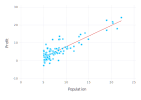

In [420]:
#To show the regression fit
red=parse(Colorant,"#dc322f");
append!(p.layers, layer(x=X[:,2], y=X*theta_opt ,Geom.line,Theme(default_color=red)))
p

In [421]:
# Predict values for population sizes of 35,000 and 70,000
predict1 = reshape([1, 3.5],(1,2)) *theta_opt;
print("For population = 35,000, we predict a profit of",predict1*10000);
predict2 = reshape([1, 7],(1,2)) * theta_opt;
print("\nFor population = 70,000, we predict a profit of",predict2*10000);


For population = 35,000, we predict a profit of[2171.69]
For population = 70,000, we predict a profit of[43670.2]

In [422]:
theta0_vals = linspace(-10, 10, 100);
theta1_vals = linspace(-1, 4, 100);

# initialize J_vals to a matrix of 0's
J_vals = zeros(length(theta0_vals), length(theta1_vals));

# Fill out J_vals
for i = 1:length(theta0_vals)
    for j = 1:length(theta1_vals)
      t = [theta0_vals[i]; theta1_vals[j]];
      J_vals[i,j] = computeCost(X, y, t);
    end
end

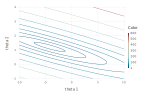

In [423]:
# The Contour Plot of J 
plot(x=Array(theta0_vals),Guide.xlabel("theta 1"), y=Array(theta1_vals), Guide.ylabel("theta 2"), z=J_vals, Geom.contour(levels=logspace(-2,3,20)))

## Logistic Regression for Multiple Variables

In [458]:
# reading data (house prices)
data_mul_var = readtable("ex1data2.txt"); 
# renaming columns
new_names = ["Size","Bedrooms","Price"];
names!(data_mul_var.colindex, map(parse,new_names));

In [459]:
#Plot for the data


In [460]:
# Seperating Features and labels
X_ = data_mul_var[:,[:Size,:Bedrooms]];
y_ = data_mul_var[:Price];
num_tr_ex = length(y_);

In [461]:
# adding the one column in the features
X_ = Array(X_)
z = ones(num_tr_ex,1)
X_ = hcat(z,X_)
y_ = Array(y_)
#defining theta, iterations and learning rate
theta_ = zeros(3,1);
iterations = 1500;
alpha_ = 0.1;

In [462]:
# Feature scaling
A = X_[:,2]
B = X_[:,3]
σ1 = mean(A)
σ2 = mean(B)
A_ = [(x - σ1)/(maximum(A)-minimum(A)) for x in A];
B_ = [(x - σ2)/(maximum(B)-minimum(B)) for x in B];

In [463]:
# preprocessing and calling gradient descent
X_ = hcat(z,A_,B_)
theta_opt_, J_hist = gradientDescent(X_,y_,theta_,alpha_,iterations)

Minimum cost is 2.071023014422672e9

([3.39119e5; 4.89336e5; -15057.0], [5.42883e10; 4.53741e10; … ; 2.07104e9; 2.07102e9])

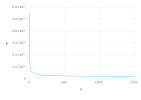

In [464]:
# to show J with time
plot(y=J_hist,x=1:1500,Geom.line)

In [474]:
##Price Prediction

In [472]:
area_nor = (1650 - σ1)/(maximum(A)-minimum(A))
room_nor = (3- σ2)/(maximum(A)-minimum(A))

-4.7962780882035506e-5

In [473]:
reshape([1;area_nor;room_nor],(1,3))*theta_opt_

1×1 Array{Float64,2}:
 2.92098e5

## Normal Equation 

In [466]:
x = Array(data_mul_var[:,[:Size,:Bedrooms]]);
y = Array(data_mul_var[:Price]);

In [467]:
theta_opt = inv(x'*x)*x'*y; #normal equation method to find out optimum theta

In [468]:
reshape([1650;3],(1,2))*theta_opt

1-element Array{Float64,1}:
 2.82525e5

In [469]:
theta_opt

2-element Array{Float64,1}:
   140.275
 17023.6  

In [470]:
computeCost(x,y,theta_opt)

2.2753474933657026e9